In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Our data today is a test set brought to you by Thinkful. We will be analyzing the data and building some models to help predict and provide more details on the types of users most likely to join a loyalty program.

In [2]:
# Pull data into DF
loyalty_program = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')
del loyalty_program['Unnamed: 0']

In [3]:
loyalty_program.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [4]:
loyalty_program.describe()

,purch_amt,age,days_since_last_purch
count,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908
std,20.473148,10.153072,16.422187
min,-43.950000,-22.000000,-9.000000
25%,30.210000,19.000000,45.000000
50%,43.970000,26.000000,57.000000
75%,57.830000,33.000000,68.000000
max,142.200000,71.000000,125.000000


## Feature Exploration - X/Y

We will explore each feature as follows:

- Look at the feature distribution
- Plot against metric of interest (for continuous variables)
- Run significance testing to determine value of feature

In [5]:
# Import stats tests
from scipy import stats

# Set seaborn plot style
sns.set_style('darkgrid')

#### Purchase Amount

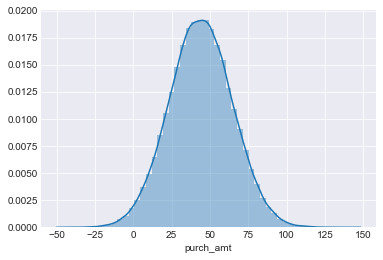

In [6]:
sns.distplot(loyalty_program.purch_amt)

Normal distribution indicating t-test eligibility

Purchase amount's below 0 are strange, so let's look at those

In [7]:
loyalty_program[loyalty_program.purch_amt < 0]

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
103,-6.79,female,yes,18.0,67.0,False
115,-12.85,female,yes,23.0,63.0,False
119,-5.00,male,no,23.0,69.0,False
126,-3.85,male,no,21.0,51.0,False
163,-1.34,female,yes,16.0,45.0,False
481,-0.63,male,no,35.0,54.0,False
497,-3.24,male,no,13.0,78.0,False
576,-1.60,female,yes,29.0,54.0,False
639,-15.68,female,no,30.0,51.0,False
685,-6.56,female,yes,27.0,75.0,False


No noticeable pattern that would indicate a trend we could fill/adjust the data on - let's remove these data points from our analysis

In [8]:
loyalty_program = loyalty_program[loyalty_program.purch_amt > 0]

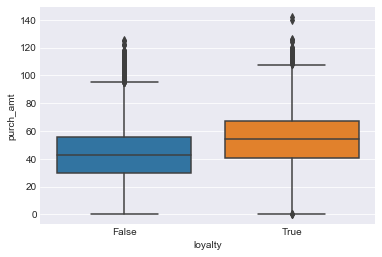

In [9]:
sns.boxplot(x='loyalty', y='purch_amt', data=loyalty_program)

In [10]:
a = loyalty_program[loyalty_program.loyalty == True].purch_amt
b = loyalty_program[loyalty_program.loyalty == False].purch_amt
stats.ttest_ind(a, b)

Ttest_indResult(statistic=75.67199448826128, pvalue=0.0)

We have a significant predictor here, indicating that users who are in the Loyalty Program also spend more on a whole

#### Age

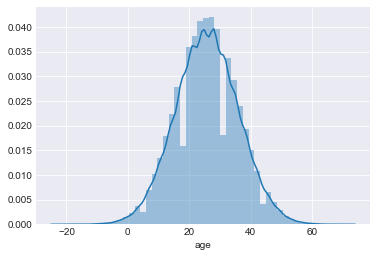

In [11]:
sns.distplot(loyalty_program.age)

Normal distribution indicating t-test eligibility

Another instance of age values below 0

In [12]:
loyalty_program[loyalty_program.age < 0]

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
310,41.28,female,yes,-6.0,63.0,False
361,17.58,male,no,-3.0,39.0,False
771,63.74,female,yes,-1.0,68.0,False
828,1.56,female,no,-3.0,64.0,False
988,47.45,male,yes,-2.0,70.0,False
1362,18.87,female,yes,-8.0,92.0,False
1906,49.32,male,yes,-8.0,33.0,False
2042,46.50,female,yes,-2.0,73.0,False
2536,82.48,female,yes,-2.0,44.0,False
2770,37.30,female,no,-8.0,20.0,False


No noticeable pattern again  - let's remove these data points from our analysis

In [13]:
loyalty_program = loyalty_program[loyalty_program.age > 0]

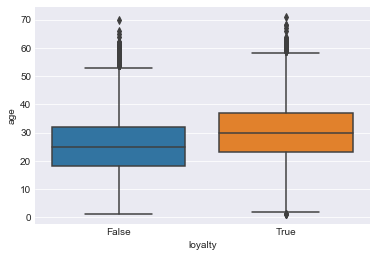

In [14]:
sns.boxplot(x='loyalty', y='age', data=loyalty_program)

In [15]:
a = loyalty_program[loyalty_program.loyalty == True].age
b = loyalty_program[loyalty_program.loyalty == False].age
stats.ttest_ind(a, b)

Ttest_indResult(statistic=63.02165492482211, pvalue=0.0)

Another significant predictor indicating loyalty program users tend to be older

#### Days Since Last Purchase

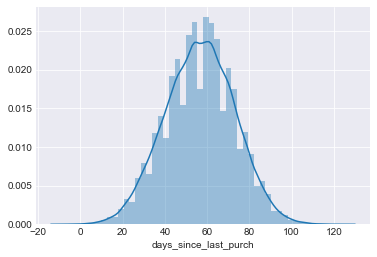

In [16]:
sns.distplot(loyalty_program.days_since_last_purch)

Normal distribution indicating t-test eligibility

Let's check amount's below 0 again

In [17]:
loyalty_program[loyalty_program.days_since_last_purch < 0]

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
5354,57.82,male,no,21.0,-8.0,True
7288,68.12,female,no,36.0,-3.0,False
8059,54.15,male,yes,43.0,-5.0,True
12612,56.48,male,no,25.0,-4.0,True
16763,49.73,female,yes,2.0,-3.0,True
16872,66.34,female,no,40.0,-1.0,True
21659,57.97,female,yes,43.0,-1.0,True
33000,26.27,male,yes,47.0,-1.0,True
35546,40.48,male,no,28.0,-1.0,True
40532,42.69,male,yes,6.0,-1.0,False


No noticeable pattern - we'll remove the data points

In [18]:
loyalty_program = loyalty_program[loyalty_program.days_since_last_purch > 0]

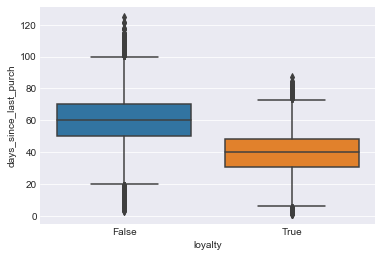

In [19]:
sns.boxplot(x='loyalty', y='days_since_last_purch', data=loyalty_program)

In [20]:
a = loyalty_program[loyalty_program.loyalty == True].days_since_last_purch
b = loyalty_program[loyalty_program.loyalty == False].days_since_last_purch
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-177.06872661525824, pvalue=0.0)

We have a significant predictor here, indicating that users who go longer without purchasing are less likely to be in the loyalty program

#### Gender

In [21]:
# Take crosstab of gender by loyalty
gender = pd.crosstab(loyalty_program.gender, loyalty_program.loyalty)
gender.apply(lambda x: x/x.sum(), axis=1)

loyalty,False,True
gender,,
female,0.831758,0.168242
male,0.829915,0.170085


Gender appears to have virtually no impact, but let's run a chi squared test just to be sure

In [22]:
stats.chisquare(gender)

Power_divergenceResult(statistic=array([0.49623721, 1.54212196]), pvalue=array([0.48115814, 0.21430223]))

Indeed, looks as if gender is not a factor

#### Card on File

In [23]:
# Take crosstab of gender by loyalty
card_on_file = pd.crosstab(loyalty_program.card_on_file, loyalty_program.loyalty)
card_on_file.apply(lambda x: x/x.sum(), axis=1)

loyalty,False,True
card_on_file,,
no,0.830717,0.169283
yes,0.830949,0.169051


Again it appears (oddly enough) that someone have a card on file is not predictive of whether they are in the loyalty program

In [24]:
stats.chisquare(card_on_file)

Power_divergenceResult(statistic=array([0.04466135, 0.0004532 ]), pvalue=array([0.83262797, 0.98301561]))

## Feature Exploration - X/X

Next, we'll take a look at how the features relate to each other. First up, we'll plot the continuous variables relative to each other

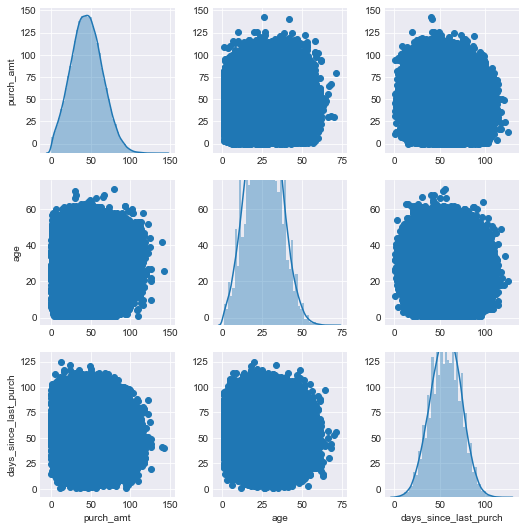

In [25]:
# Break out continuous vars for analysis
cont_vars = loyalty_program[['purch_amt','age','days_since_last_purch']]
g = sns.PairGrid(cont_vars, despine=True)

g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter)

plt.show()

                       purch_amt       age  days_since_last_purch
purch_amt               1.000000  0.039604              -0.098399
age                     0.039604  1.000000              -0.084786
days_since_last_purch  -0.098399 -0.084786               1.000000


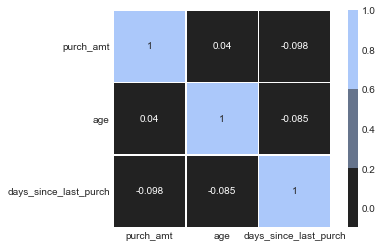

In [26]:
# Make the correlation matrix.
corrmat = cont_vars.corr()
print(corrmat)

# Draw the heatmap using seaborn.
color = sns.diverging_palette(250, 250, s=90, l=80, sep=5, n=5, center='dark')
ax = sns.heatmap(corrmat, center=0, annot=True, linewidths=.5, cmap=color, square=True)
plt.show()

No evidence of linearity.

With our feature's normal distributions, lack of collinearity, and lack of predictive power in our categorical features it's starting to look like a Naive Bayes model will be a great predictor here

----

Now we'll look at some of the categorical variables as they relate to our continuous ones

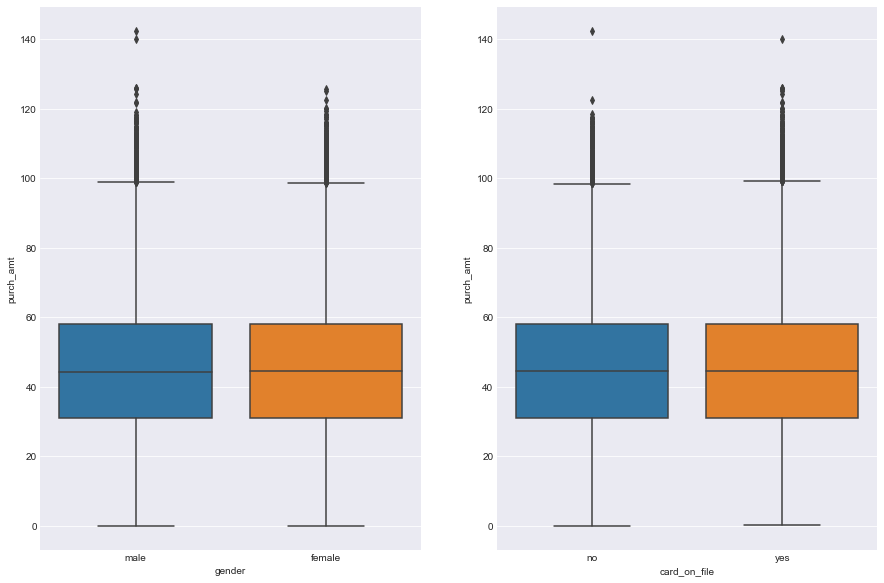

In [27]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='gender', y='purch_amt', data=loyalty_program)

plt.subplot(1,2,2)
sns.boxplot(x='card_on_file', y='purch_amt', data=loyalty_program)
plt.show()

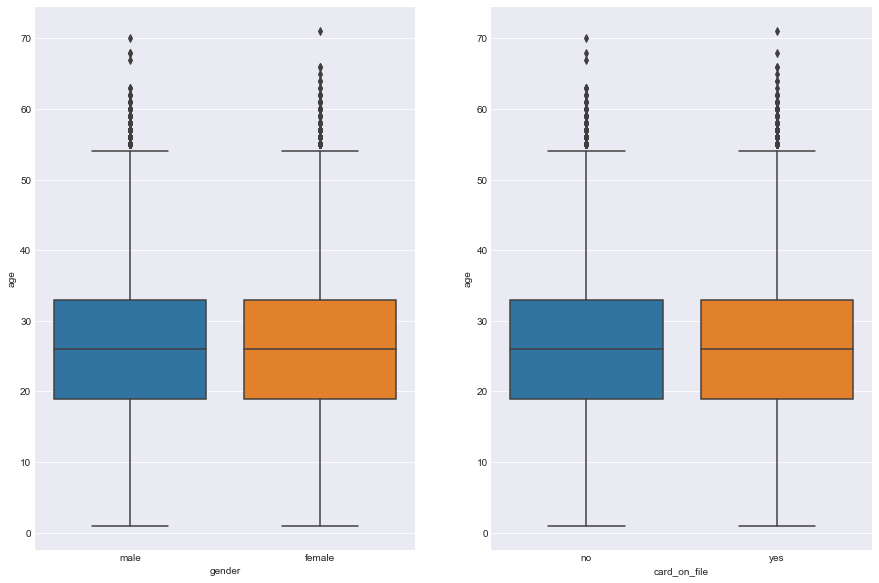

In [28]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='gender', y='age', data=loyalty_program)

plt.subplot(1,2,2)
sns.boxplot(x='card_on_file', y='age', data=loyalty_program)
plt.show()

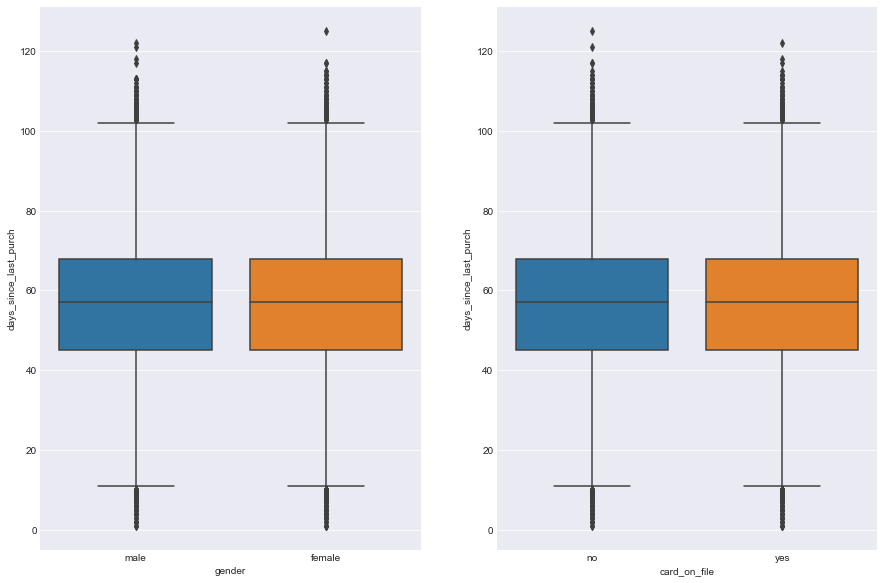

In [29]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='gender', y='days_since_last_purch', data=loyalty_program)

plt.subplot(1,2,2)
sns.boxplot(x='card_on_file', y='days_since_last_purch', data=loyalty_program)
plt.show()

Clearly our categorical variables have no value for our models in this situation.

## Modeling

Based on our data exploration we know the following:

- Our continuous variables are all significant predictors of whether someone is in the loyalty program
- Our categorical variables are all NOT significant predictors of whether someone is in the loyalty program
- Our continuous variables all have a normal distribution
- Our continuous variables are not collinear

With that in mind, there are 3 models I'd like to run:

1) Naive Bayes - with the way the data is set up I feel most confidently about the success of this model

2) Logistic Regression - with the non-linearity between our variables, this is a worthy model to try

3) Random Forest Classifier - it's consistent performance in all instances serves as a good baseline to look at in all modeling problems

In [30]:
# Import desired supervised learning models
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.linear_model import LogisticRegression as Log
from sklearn.ensemble import RandomForestClassifier as RFC

In [31]:
# Set X and Y predicts
X = cont_vars
Y = np.where(loyalty_program.loyalty == True, 1, 0)
pd.crosstab(Y, 'count')

col_0,count
row_0,
0,97534
1,19859


Our data weights heavily in the direction of users not being in the loyalty program. Let's resample our data to a 50-50 split to improve the predictive capacity.

In [32]:
# Resample data so that we have an equal distribution of positives and negaties
from imblearn.under_sampling import RandomUnderSampler as sampler

ratio = sampler(ratio={0:19859, 1:19859})
X_train, Y_train = ratio.fit_sample(X, Y)

pd.crosstab(Y_train, columns='count')

col_0,count
row_0,
0,19859
1,19859


Now let's run some of our models. We'll test our resampled data performance vs. our original set

In [33]:
# Import cross val tool
from sklearn.model_selection import cross_val_score as cv

# Set models
nb = NB()
log = Log()
rfc = RFC()

# Run models
print(cv(nb,X_train,Y_train,cv=10))
print(cv(log,X_train,Y_train,cv=10))
print(cv(rfc,X_train,Y_train,cv=10))

[0.79254783 0.80538771 0.79380665 0.79154079 0.79632427 0.7948137
 0.80035247 0.80161128 0.79003021 0.79420655]
[0.79179255 0.80085599 0.7927996  0.79103726 0.79758308 0.79758308
 0.79934542 0.80186304 0.78977845 0.79244332]
[0.74974824 0.75453172 0.7540282  0.74949648 0.76032226 0.75327291
 0.75528701 0.75931521 0.75981873 0.75264484]


In [34]:
# Run models
print(cv(nb,X,Y,cv=10))
print(cv(log,X,Y,cv=10))
print(cv(rfc,X,Y,cv=10))

[0.8669506  0.8649063  0.86567291 0.86899489 0.86438368 0.86889854
 0.86813187 0.86779112 0.86940966 0.87016528]
[0.86567291 0.86660988 0.86507666 0.8669506  0.86421331 0.86710963
 0.86906892 0.8679615  0.86898373 0.86948373]
[0.84080068 0.83475298 0.83339012 0.84054514 0.8396797  0.84180935
 0.84121305 0.83993526 0.83959451 0.83676947]


It seems like our unsampled data set performs much better than our resampled see. Additional exploration in our confusion matrix (not included here) showed this to be gains in true positive and not true negative predictions.

Additionally logistic regression and naive bayes models perform on par with each other. So we'll work with those two model type, using our original dataset for training

Now let's see what the confusion matrices look like.

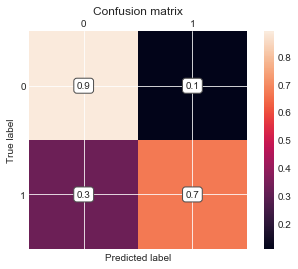

In [35]:
from sklearn.metrics import confusion_matrix as CM

# Fit our Naive Bayes Model
nb.fit(X,Y)
y_predict = nb.predict(cont_vars)

# Graph confusion matrix
cm = CM(Y, y_predict)
tn, fp, fn, tp = cm.ravel()
cm = pd.DataFrame(cm)
cm.loc[0,0] = tn/(tn+fn)
cm.loc[0,1] = fn/(tn+fn)
cm.loc[1,0] = fp/(tp+fp)
cm.loc[1,1] = tp/(tp+fp)

fig, ax = plt.subplots()
im = ax.matshow(cm)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix')
fig.colorbar(im)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

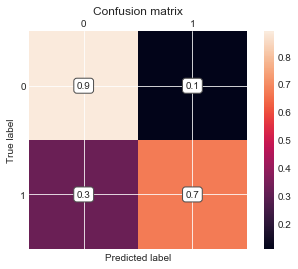

In [36]:
# Fit our Naive Bayes Model
log.fit(X,Y)
y_predict = log.predict(cont_vars)

# Graph confusion matrix
cm = CM(Y, y_predict)
tn, fp, fn, tp = cm.ravel()
cm = pd.DataFrame(cm)
cm.loc[0,0] = tn/(tn+fn)
cm.loc[0,1] = fn/(tn+fn)
cm.loc[1,0] = fp/(tp+fp)
cm.loc[1,1] = tp/(tp+fp)

fig, ax = plt.subplots()
im = ax.matshow(cm)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix')
fig.colorbar(im)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

90% True Negative and, more importantly, a 70% True Positive prediction rate for both our models. Not too shabby.

-----

Finally we'll use our model results to explore our data further and help target users NOT in the loyalty program that our models are telling us should be, or are close to joining.

We'll do the following:

1) Pull a list of all positive predictions that are NOT on the loyalty program

2) Rank all negative predictions using probability scores

In [37]:
# Fit our Naive Bayes Model
nb.fit(X,Y)


# Extract predict and probability values
nb_predict = nb.predict(cont_vars)
nb_proba = nb.predict_proba(X)

# Fit our Logistic Regression Model
log.fit(X,Y)

# Extract predict and probability values
log_predict = log.predict(cont_vars)
log_proba = log.predict_proba(cont_vars)


# Add values to our dataframe for filtering
loyalty_program['nb_predict'] = nb_predict
loyalty_program['nb_proba'] = nb_proba[:,1]
loyalty_program['log_predict'] = log_predict
loyalty_program['log_proba'] = log_proba[:,1]

Now we'll use composite results from both of our models to filter out valuable customers to target. First, let's pull a list of customers that both of our models spit out positive predictions for that are not yet on the loyalty program.

In [38]:
loyalty_program[(loyalty_program.loyalty==False)
                & (loyalty_program.nb_predict==1)
                & (loyalty_program.log_predict==1)]

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,nb_predict,nb_proba,log_predict,log_proba
34,60.93,female,no,28.0,35.0,False,1,0.564506,1,0.562987
43,56.50,female,yes,28.0,34.0,False,1,0.549029,1,0.554662
50,51.32,male,no,28.0,34.0,False,1,0.508909,1,0.515860
105,75.57,female,yes,40.0,36.0,False,1,0.786128,1,0.765831
130,32.78,female,yes,44.0,34.0,False,1,0.586921,1,0.572457
143,63.80,female,no,52.0,48.0,False,1,0.612840,1,0.555798
161,93.12,male,no,34.0,50.0,False,1,0.572112,1,0.505676
174,58.83,female,no,25.0,35.0,False,1,0.511068,1,0.510613
188,55.20,female,no,36.0,38.0,False,1,0.559327,1,0.543651
215,81.17,male,no,31.0,34.0,False,1,0.766306,1,0.752195


Here's a nice group of 3700 fictional customers to target with loyalty campaigns!

Next, we'll average our probability scores together and rank our negative predicts by a combined probability

In [39]:
# Average out probability metrics
loyalty_program['combined_proba'] = (loyalty_program.nb_proba + loyalty_program.log_proba)/2

# Pull out False predictions not on the loyalty program and rank by probability score
loyalty_program[(loyalty_program.loyalty==False)
                & (loyalty_program.nb_predict==0)
                & (loyalty_program.log_predict==0)].sort_values(by='combined_proba', ascending=False)

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,nb_predict,nb_proba,log_predict,log_proba,combined_proba
37119,50.45,female,yes,31.0,36.0,False,0,4.999465e-01,0,0.496352,0.498149
26489,55.58,female,yes,26.0,35.0,False,0,4.974540e-01,0,0.498433,0.497943
32764,57.16,female,yes,25.0,35.0,False,0,4.977497e-01,0,0.498036,0.497893
76774,27.74,male,no,37.0,32.0,False,0,4.965269e-01,0,0.498782,0.497655
79632,53.66,male,yes,29.0,36.0,False,0,4.993217e-01,0,0.495936,0.497629
26543,15.76,male,no,40.0,30.0,False,0,4.990987e-01,0,0.495290,0.497194
98647,35.62,male,yes,36.0,34.0,False,0,4.977091e-01,0,0.495987,0.496848
71859,52.19,female,no,28.0,35.0,False,0,4.957706e-01,0,0.497493,0.496632
56585,55.66,male,yes,24.0,34.0,False,0,4.936364e-01,0,0.499367,0.496502
54064,67.82,female,yes,16.0,34.0,False,0,4.999684e-01,0,0.492583,0.496276


And there you have another list to pull prospects from. You can decide on a threshold after which you stop pulling prospects, utilizing cost/revenue analyses to determine your threshold

## Conclusions

So what did we learn today?

1) Loyalty program members tend to be older, spend more and shop more frequently

2) Gender does not influence decisions to be a loyalty member

3) Having a card on file does not influence decisions to be a loyalty member

4) Ensemble modeling is a good way to look for prospects to actively pursue using loyalty campaigns